<a href="https://colab.research.google.com/github/dudaspm/PSUPythonWorkshop/blob/master/TLTSymposiumDemo/TLT_Demo_US_Vaccinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TLT Demo - US Vaccinations

• A Jupyter Notebook Example

## First the Data

### Acknowledgement 

<cite>Max Roser, Hannah Ritchie, Esteban Ortiz-Ospina and Joe Hasell (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]</cite>
    
Original Link: https://github.com/owid/covid-19-data (Accessed 3/11/2021)
Source Link: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations 


<cite>Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. IEEE Annals of the History of Computing, 9(03), 90-95.</cite>

#### Get the Data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv"
data = []
data=pd.read_csv(url)
data = data.dropna() # removed NAs with 0s

### Remove the United States entry (As this is a sum of all locations in US)

data = data[data.location != "United States"]

#### Preview the Data

In [3]:
data.tail()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
7753,2021-05-06,Wyoming,363390.0,486635.0,198930.0,28.61,62.79,165555.0,34.37,84.08,241.0,1427.0,2466.0,0.747
7754,2021-05-07,Wyoming,367548.0,487055.0,200309.0,29.09,63.51,168356.0,34.61,84.16,4158.0,1642.0,2837.0,0.755
7755,2021-05-08,Wyoming,369771.0,490875.0,201002.0,29.36,63.89,169905.0,34.73,84.82,2223.0,1650.0,2851.0,0.753
7756,2021-05-09,Wyoming,369975.0,490875.0,201135.0,29.39,63.93,170086.0,34.75,84.82,204.0,1638.0,2830.0,0.754
7757,2021-05-10,Wyoming,370014.0,490875.0,201174.0,29.40,63.93,170130.0,34.76,84.82,39.0,1638.0,2830.0,0.754


#### Creating a Scatterplot

<cite>Scatter Plot — Matplotlib 3.3.4 Documentation. https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html. Accessed 14 Mar. 2021.</cite>

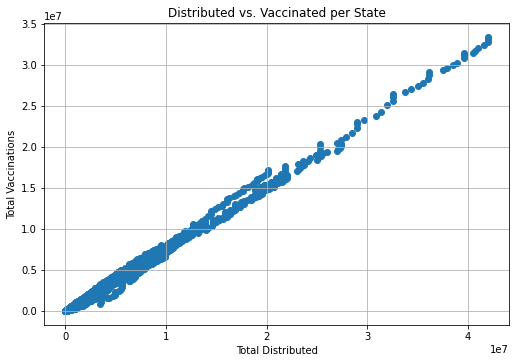

In [4]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(600*px, 400*px))

ax.scatter(data.total_distributed, data.total_vaccinations)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Total Distributed' )
ax.set_ylabel( 'Total Vaccinations' )
plt.title( 'Distributed vs. Vaccinated per State' )
ax.grid()

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

#### Creating a Bar Chart

<cite>Grouped Bar Chart with Labels — Matplotlib 3.3.4 Documentation. https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html. Accessed 14 Mar. 2021.
</cite>

In [19]:
currentDate = data.iloc[len(data)-1].date
data[(data.date == currentDate)].head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
118,2021-05-10,Alabama,2773615.0,4277330.0,1657672.0,25.98,56.57,1273670.0,33.81,87.24,5411.0,20899.0,4262.0,0.648
237,2021-05-10,Alaska,575174.0,777945.0,314070.0,37.03,78.62,270922.0,42.93,106.34,3806.0,1757.0,2402.0,0.739
356,2021-05-10,American Samoa,39666.0,54030.0,22122.0,31.77,71.23,17695.0,39.72,97.02,0.0,132.0,2370.0,0.734
475,2021-05-10,Arizona,5411726.0,7081205.0,3096670.0,31.91,74.35,2322939.0,42.54,97.29,39121.0,33564.0,4611.0,0.764
594,2021-05-10,Arkansas,1905274.0,2677170.0,1109772.0,27.95,63.13,843372.0,36.77,88.71,5272.0,10766.0,3567.0,0.712


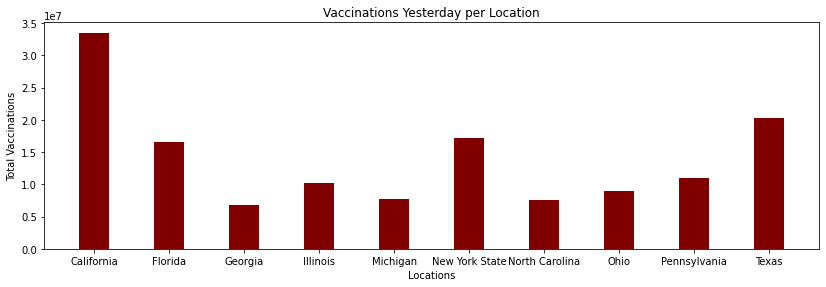

In [22]:
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
data = data[(data.date == currentDate)]
top10Yest = data[data.location.isin(top10)]
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(top10Yest.location, top10Yest.total_vaccinations, color ='maroon', width = 0.4)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations' )
plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

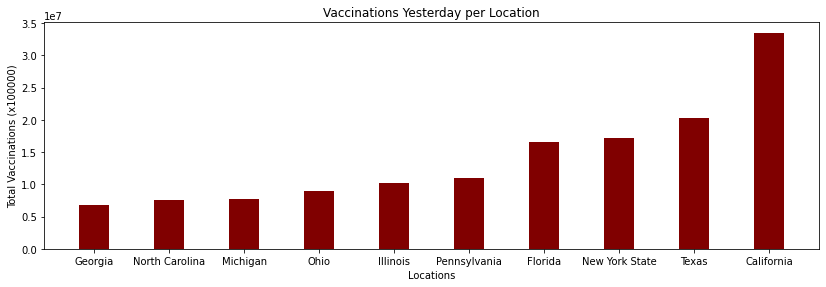

In [23]:
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]

sortedData = data.sort_values(by=['total_vaccinations'])
top10 = sortedData[sortedData.location.isin(top10)]

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(top10.location, top10.total_vaccinations, color ='maroon', width = 0.4)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations' )
plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )


In [58]:
import ipywidgets as widgets
from IPython.display import display

options = ['total_vaccinations', 'total_distributed', 'people_fully_vaccinated_per_hundred', 'total_vaccinations_per_hundred']

def on_change(updatePlot):
  top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]

  sortedData = data.sort_values(by=[updatePlot])
  top10 = sortedData[sortedData.location.isin(top10)]

  px = 1/plt.rcParams['figure.dpi']  # pixel in inches
  fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
  ax.bar(top10.location, top10[updatePlot], color ='maroon', width = 0.4)

  # Add labels, a title and grid lines to the plot
  ax.set_xlabel( 'Locations' )
  ax.set_ylabel( updatePlot )
  plt.title( updatePlot+' Yesterday per Location' )
  # Show the figure (here in Jupyter)
  plt.show( fig )
  plt.close( fig )

widgets.interact(on_change, updatePlot=options)

interactive(children=(Dropdown(description='updatePlot', options=('total_vaccinations', 'total_distributed', '…